# Advanced Thermochemical Heat Storage Simulation
### Material: Ca(OH)₂ ↔ CaO + H₂O

This notebook models a high-temperature **thermochemical heat storage** system 
using the reversible reaction:

**Ca(OH)₂ (s) ↔ CaO (s) + H₂O (g)**

Thermochemical materials can:
- Store heat at **high energy density** compared to sensible or latent heat systems.
- Deliver heat at **tunable temperatures** depending on system pressure.
- Be cycled many times with minimal degradation (depending on conditions).

Here, we:
1. Define the **thermodynamic model** for equilibrium pressure and temperature.
2. Calculate **energy density** and **round-trip efficiency**.
3. Plot **p_eq vs T** and **T vs p_eq** to visualize storage behaviour.
4. Explain results in the context of high-temperature energy storage.


In [ ]:
# Step 1: Import the required libraries for numerical calculations and plotting
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Step 2: Define constants based on literature values for Ca(OH)2 ↔ CaO + H2O

R = 8.314462618  # Universal gas constant, J/mol·K
delta_H = 104.4e3  # Reaction enthalpy (J/mol)
delta_S = 143.8    # Reaction entropy change (J/mol·K)
molar_mass = 74.09  # g/mol of Ca(OH)2

# These values will be used to calculate equilibrium properties.


In [ ]:
# Step 3: Define functions for thermochemical calculations

def p_eq(T):
    """
    Calculate equilibrium pressure (bar) at temperature T (K)
    using the van 't Hoff equation:
    ln(p_eq) = (-ΔH / (R*T)) + (ΔS / R)
    """
    ln_p = -delta_H / (R * T) + delta_S / R
    return np.exp(ln_p)

def find_T_for_pressure(p_target):
    """
    Given a target pressure, find the corresponding equilibrium temperature (K).
    Uses a simple search and linear interpolation.
    """
    Tgrid = np.linspace(300, 1200, 2000)
    pgrid = p_eq(Tgrid)
    diff = np.log(pgrid) - np.log(p_target)
    idx = np.where(np.sign(diff[:-1]) * np.sign(diff[1:]) <= 0)[0]
    if idx.size == 0:
        return None
    i = idx[0]
    t1, t2 = Tgrid[i], Tgrid[i+1]
    f1, f2 = diff[i], diff[i+1]
    return t1 - f1 * (t2 - t1) / (f2 - f1)

def energy_density_per_kg():
    """
    Calculate theoretical energy density in kWh/kg.
    """
    mol_per_kg = 1000.0 / molar_mass
    return delta_H * mol_per_kg / 3.6e6  # Convert J to kWh

def round_trip_efficiency(mass_kg=10, Cp=900, T_charge=900, T_discharge=500, T_ref=298.15):
    """
    Calculate a simplified round-trip efficiency assuming:
    - Sensible heat for charging and discharging is considered
    - Reaction enthalpy dominates storage
    """
    mol_per_kg = 1000/molar_mass
    reaction_energy_J = delta_H * mol_per_kg * mass_kg
    sensible_in = Cp * mass_kg * (T_charge - T_ref)
    sensible_out = Cp * mass_kg * (T_discharge - T_ref)
    energy_in = reaction_energy_J + sensible_in
    energy_out = reaction_energy_J + sensible_out
    return energy_out / energy_in


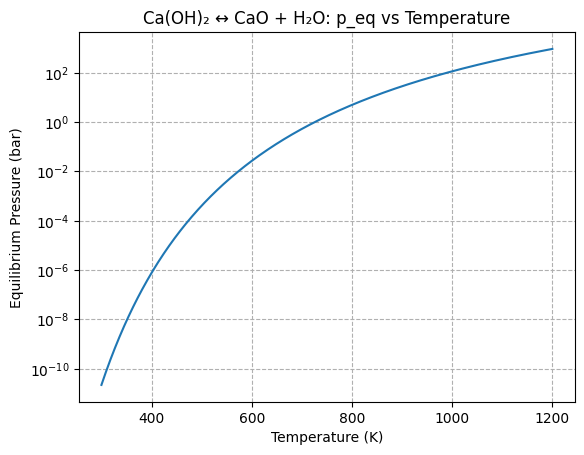

In [ ]:
# Step 4: Plot equilibrium pressure as a function of temperature
Tgrid = np.linspace(300, 1200, 500)
pgrid = p_eq(Tgrid)

plt.figure()
plt.semilogy(Tgrid, pgrid)
plt.xlabel("Temperature (K)")
plt.ylabel("Equilibrium Pressure (bar)")
plt.title("Ca(OH)₂ ↔ CaO + H₂O: p_eq vs Temperature")
plt.grid(True, which="both", ls="--")
plt.show()

# Interpretation:
# This curve shows that at higher temperatures, equilibrium pressure rises sharply,
# meaning water vapour release (and thus heat delivery) is favoured.

In [ ]:
# Step 6: Calculate performance metrics
ed = energy_density_per_kg()
rte = round_trip_efficiency()

print(f"Energy density (theoretical): {ed:.4f} kWh/kg")
print(f"Simplified round-trip efficiency: {rte:.3f}")

# Interpretation:
# The high energy density compared to water or PCM systems
# shows the advantage of thermochemical materials.
# Round-trip efficiency is simplified here but indicates practical feasibility.


Energy density (theoretical): 0.3914 kWh/kg
Simplified round-trip efficiency: 0.815
